<a href="https://colab.research.google.com/github/scottthomaswx/GEFS_Plotter/blob/main/GEFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
!pip install datetime --quiet
!pip install numpy --quiet
!pip install matplotlib  -quiet
!pip install cartopy --quiet
!pip install xarray[complete] --quiet
!pip install metpy --quiet
!pip install pandas --quiet
!pip install cfgrib
!apt-get install -y libeccodes0
!mkdir GEFS_Data

In [4]:
import requests
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from metpy import units
import cartopy.feature as cfeature
import pandas as pd
from metpy.plots import USCOUNTIES

ModuleNotFoundError: ignored

In [ ]:
year = '2024'
month = '01'
day = '03'
run_hour = '12'

In [ ]:
ensemblelist=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
fhour_list = np.arange(132,175,6)

In [ ]:
q=0
z=0
while q < len(fhour_list):
  url1 = f'https://noaa-gefs-pds.s3.amazonaws.com/gefs.{year}{month}{day}/{run_hour}/atmos/pgrb2sp25/gec00.t{run_hour}z.pgrb2s.0p25.f{fhour_list[q]}'
  r1 = requests.get(url1)
  file1= f'./GEFS_Data/{year}{month}{day}_gec00.t{run_hour}z.pgrb2s.0p25.f{fhour_list[q]}.grb2'
  with open(file1, 'wb') as f1:
        f1.write(r1.content)
  for a in ensemblelist:
      url2 = f'https://noaa-gefs-pds.s3.amazonaws.com/gefs.{year}{month}{day}/{run_hour}/atmos/pgrb2sp25/gep{str(a)}.t{run_hour}z.pgrb2s.0p25.f{fhour_list[q]}'
      r2 = requests.get(url2)
      file2=f'./GEFS_Data/{year}{month}{day}_gep{str(a)}.t{run_hour}z.pgrb2s.0p25.f{fhour_list[q]}.grb2'
      with open(file2, 'wb') as f2:
          f2.write(r2.content)
  url3 = f'https://noaa-gefs-pds.s3.amazonaws.com/gefs.{year}{month}{day}/{run_hour}/atmos/pgrb2sp25/geavg.t{run_hour}z.pgrb2s.0p25.f{fhour_list[q]}'
  r3 = requests.get(url3)
  file3=f'./GEFS_Data/{year}{month}{day}_geavg.t{run_hour}z.pgrb2s.0p25.f{fhour_list[q]}.grb2'
  with open(file3, 'wb') as f3:
    f3.write(r3.content)

  url4 = f'https://noaa-gefs-pds.s3.amazonaws.com/gefs.{year}{month}{day}/{run_hour}/atmos/pgrb2sp25/gespr.t{run_hour}z.pgrb2s.0p25.f{fhour_list[q]}'
  r4 = requests.get(url4)
  file4= f'./GEFS_Data/{year}{month}{day}_gespr.t{run_hour}z.pgrb2s.0p25.f{fhour_list[q]}.grb2'
  with open(file4, 'wb') as f4:
    f4.write(r4.content)
  q+=1

z=0
while z < len(fhour_list):
  url1 = f'https://noaa-gefs-pds.s3.amazonaws.com/gefs.{year}{month}{day}/{run_hour}/atmos/pgrb2ap5/gec00.t{run_hour}z.pgrb2a.0p50.f{fhour_list[z]}'
  r1 = requests.get(url1)
  file1= f'./GEFS_Data/{year}{month}{day}_gec00.t{run_hour}z.pgrb2a.0p50.f{fhour_list[z]}.grb2'
  with open(file1, 'wb') as f1:
        f1.write(r1.content)

  for b in ensemblelist:
      url2 = f'https://noaa-gefs-pds.s3.amazonaws.com/gefs.{year}{month}{day}/{run_hour}/atmos/pgrb2ap5/gep{str(b)}.t{run_hour}z.pgrb2a.0p50.f{fhour_list[z]}'
      r2 = requests.get(url2)
      file2=f'./GEFS_Data/{year}{month}{day}_gep{str(b)}.t{run_hour}z.pgrb2a.0p50.f{fhour_list[z]}.grb2'
      with open(file2, 'wb') as f2:
          f2.write(r2.content)

  url3 = f'https://noaa-gefs-pds.s3.amazonaws.com/gefs.{year}{month}{day}/{run_hour}/atmos/pgrb2ap5/geavg.t{run_hour}z.pgrb2a.0p50.f{fhour_list[z]}'
  r3 = requests.get(url3)
  file3=f'./GEFS_Data/{year}{month}{day}_geavg.t{run_hour}z.pgrb2a.0p50.f{fhour_list[z]}.grb2'
  with open(file3, 'wb') as f3:
    f3.write(r3.content)

  url4 = f'https://noaa-gefs-pds.s3.amazonaws.com/gefs.{year}{month}{day}/{run_hour}/atmos/pgrb2ap5/gespr.t{run_hour}z.pgrb2a.0p50.f{fhour_list[z]}'
  r4 = requests.get(url4)
  file4= f'./GEFS_Data/{year}{month}{day}_gespr.t{run_hour}z.pgrb2a.0p50.f{fhour_list[z]}.grb2'
  with open(file4, 'wb') as f4:
    f4.write(r4.content)
  z+=1

In [ ]:
gefsall = xr.open_mfdataset('./content/GEFS_Data/*geavg*grb2s.0p25*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefscon = xr.open_mfdataset('./content/GEFS_Data/*gec00*grb2s.0p25*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefs1 = xr.open_mfdataset('./content/GEFS_Data/*gep01*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefs2 = xr.open_mfdataset('./content/GEFS_Data/*gep02*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs3 = xr.open_mfdataset('./content/GEFS_Data/*gep03*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs4 = xr.open_mfdataset('./content/GEFS_Data/*gep04*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs5 = xr.open_mfdataset('./content/GEFS_Data/*gep05*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs6 = xr.open_mfdataset('./content/GEFS_Data/*gep06*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs7 = xr.open_mfdataset('./content/GEFS_Data/*gep07*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs8 = xr.open_mfdataset('./content/GEFS_Data/*gep08*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs9 = xr.open_mfdataset('./content/GEFS_Data/*gep09*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs10 = xr.open_mfdataset('./content/GEFS_Data/*gep10*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs11= xr.open_mfdataset('./content/GEFS_Data/*gep11*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs12= xr.open_mfdataset('./content/GEFS_Data/*gep12*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs13= xr.open_mfdataset('./content/GEFS_Data/*gep13*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs14= xr.open_mfdataset('./content/GEFS_Data/*gep14*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs15= xr.open_mfdataset('./content/GEFS_Data/*gep15*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs16= xr.open_mfdataset('./content/GEFS_Data/*gep16*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs17= xr.open_mfdataset('./content/GEFS_Data/*gep17*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs18= xr.open_mfdataset('./content/GEFS_Data/*gep18*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs19= xr.open_mfdataset('./content/GEFS_Data/*gep19*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs20= xr.open_mfdataset('./content/GEFS_Data/*gep20*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs21=xr.open_mfdataset('./content/GEFS_Data/*gep21*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs22= xr.open_mfdataset('./content/GEFS_Data/*gep22*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs23= xr.open_mfdataset('./content/GEFS_Data/*gep23*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs24= xr.open_mfdataset('./content/GEFS_Data/*gep24*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs25= xr.open_mfdataset('./content/GEFS_Data/*gep25*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs26= xr.open_mfdataset('./content/GEFS_Data/*gep26*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs27=xr.open_mfdataset('./content/GEFS_Data/*gep27*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs28= xr.open_mfdataset('./content/GEFS_Data/*gep28*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs29= xr.open_mfdataset('./content/GEFS_Data/*gep29*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))
gefs30= xr.open_mfdataset('./content/GEFS_Data/*gep30*grb2s.0p25*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsspr = xr.open_mfdataset('./content/GEFS_Data/*gespr*grb2s.0p25*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys': {'typeOfLevel': 'meanSea'}}).sel(longitude=slice(360-150, 360-50), latitude=slice(65,20))

gefsUAall = xr.open_mfdataset('./content/GEFS_Data/*geavg*pgrb2a.0p50*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50), latitude=slice(65,20))
gefsUAcon = xr.open_mfdataset('./content/GEFS_Data/*gec00*grb2a.0p50*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA1 = xr.open_mfdataset('./content/GEFS_Data/*gep01*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA2 = xr.open_mfdataset('./content/GEFS_Data/*gep02*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA3 = xr.open_mfdataset('./content/GEFS_Data/*gep03*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA4 = xr.open_mfdataset('./content/GEFS_Data/*gep04*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA5 = xr.open_mfdataset('./content/GEFS_Data/*gep05*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA6 = xr.open_mfdataset('./content/GEFS_Data/*gep06*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA7 = xr.open_mfdataset('./content/GEFS_Data/*gep07*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA8 = xr.open_mfdataset('./content/GEFS_Data/*gep08*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA9 = xr.open_mfdataset('./content/GEFS_Data/*gep09*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA10 = xr.open_mfdataset('./content/GEFS_Data/*gep10*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA11 = xr.open_mfdataset('./content/GEFS_Data/*gep11*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA12 = xr.open_mfdataset('./content/GEFS_Data/*gep12*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA13 = xr.open_mfdataset('./content/GEFS_Data/*gep13*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA14 = xr.open_mfdataset('./content/GEFS_Data/*gep14*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA15 = xr.open_mfdataset('./content/GEFS_Data/*gep15*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA16 = xr.open_mfdataset('./content/GEFS_Data/*gep16*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA17 = xr.open_mfdataset('./content/GEFS_Data/*gep17*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA18 = xr.open_mfdataset('./content/GEFS_Data/*gep18*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA19 = xr.open_mfdataset('./content/GEFS_Data/*gep19*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA20 = xr.open_mfdataset('./content/GEFS_Data/*gep20*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA21 = xr.open_mfdataset('./content/GEFS_Data/*gep21*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA22 = xr.open_mfdataset('./content/GEFS_Data/*gep22*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA23 = xr.open_mfdataset('./content/GEFS_Data/*gep23*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA24 = xr.open_mfdataset('./content/GEFS_Data/*gep24*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA25 = xr.open_mfdataset('./content/GEFS_Data/*gep25*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA26 = xr.open_mfdataset('./content/GEFS_Data/*gep26*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA27 = xr.open_mfdataset('./content/GEFS_Data/*gep27*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA28 = xr.open_mfdataset('./content/GEFS_Data/*gep28*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA29 = xr.open_mfdataset('./content/GEFS_Data/*gep29*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUA30 = xr.open_mfdataset('./content/GEFS_Data/*gep30*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAspr = xr.open_mfdataset('./content/GEFS_Data/*gespr*pgrb2a.0p50*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys':{'shortName': 'gh'}}).sel(longitude=slice(360-150, 360-50), latitude=slice(65,20))


In [ ]:
gefsUAall=gefsUAall.isel(isobaricInhPa=np.where(gefsUAall.isobaricInhPa==500.)[0][0])
gefsUAcon=gefsUAcon.isel(isobaricInhPa=np.where(gefsUAcon.isobaricInhPa==500.)[0][0])
gefsUA1=gefsUA1.isel(isobaricInhPa=np.where(gefsUA1.isobaricInhPa==500.)[0][0])
gefsUA2=gefsUA2.isel(isobaricInhPa=np.where(gefsUA2.isobaricInhPa==500.)[0][0])
gefsUA3=gefsUA3.isel(isobaricInhPa=np.where(gefsUA3.isobaricInhPa==500.)[0][0])
gefsUA4=gefsUA4.isel(isobaricInhPa=np.where(gefsUA4.isobaricInhPa==500.)[0][0])
gefsUA5=gefsUA5.isel(isobaricInhPa=np.where(gefsUA5.isobaricInhPa==500.)[0][0])
gefsUA6=gefsUA6.isel(isobaricInhPa=np.where(gefsUA6.isobaricInhPa==500.)[0][0])
gefsUA7=gefsUA7.isel(isobaricInhPa=np.where(gefsUA7.isobaricInhPa==500.)[0][0])
gefsUA8=gefsUA8.isel(isobaricInhPa=np.where(gefsUA8.isobaricInhPa==500.)[0][0])
gefsUA9=gefsUA9.isel(isobaricInhPa=np.where(gefsUA9.isobaricInhPa==500.)[0][0])
gefsUA10=gefsUA10.isel(isobaricInhPa=np.where(gefsUA10.isobaricInhPa==500.)[0][0])
gefsUA11=gefsUA11.isel(isobaricInhPa=np.where(gefsUA11.isobaricInhPa==500.)[0][0])
gefsUA12=gefsUA12.isel(isobaricInhPa=np.where(gefsUA12.isobaricInhPa==500.)[0][0])
gefsUA13=gefsUA13.isel(isobaricInhPa=np.where(gefsUA13.isobaricInhPa==500.)[0][0])
gefsUA14=gefsUA14.isel(isobaricInhPa=np.where(gefsUA14.isobaricInhPa==500.)[0][0])
gefsUA15=gefsUA15.isel(isobaricInhPa=np.where(gefsUA15.isobaricInhPa==500.)[0][0])
gefsUA16=gefsUA16.isel(isobaricInhPa=np.where(gefsUA16.isobaricInhPa==500.)[0][0])
gefsUA17=gefsUA17.isel(isobaricInhPa=np.where(gefsUA17.isobaricInhPa==500.)[0][0])
gefsUA18=gefsUA18.isel(isobaricInhPa=np.where(gefsUA18.isobaricInhPa==500.)[0][0])
gefsUA19=gefsUA19.isel(isobaricInhPa=np.where(gefsUA19.isobaricInhPa==500.)[0][0])
gefsUA20=gefsUA20.isel(isobaricInhPa=np.where(gefsUA20.isobaricInhPa==500.)[0][0])
gefsUA21=gefsUA21.isel(isobaricInhPa=np.where(gefsUA21.isobaricInhPa==500.)[0][0])
gefsUA22=gefsUA22.isel(isobaricInhPa=np.where(gefsUA22.isobaricInhPa==500.)[0][0])
gefsUA23=gefsUA23.isel(isobaricInhPa=np.where(gefsUA23.isobaricInhPa==500.)[0][0])
gefsUA24=gefsUA24.isel(isobaricInhPa=np.where(gefsUA24.isobaricInhPa==500.)[0][0])
gefsUA25=gefsUA25.isel(isobaricInhPa=np.where(gefsUA25.isobaricInhPa==500.)[0][0])
gefsUA26=gefsUA26.isel(isobaricInhPa=np.where(gefsUA26.isobaricInhPa==500.)[0][0])
gefsUA27=gefsUA27.isel(isobaricInhPa=np.where(gefsUA27.isobaricInhPa==500.)[0][0])
gefsUA28=gefsUA28.isel(isobaricInhPa=np.where(gefsUA28.isobaricInhPa==500.)[0][0])
gefsUA29=gefsUA29.isel(isobaricInhPa=np.where(gefsUA29.isobaricInhPa==500.)[0][0])
gefsUA30=gefsUA30.isel(isobaricInhPa=np.where(gefsUA30.isobaricInhPa==500.)[0][0])
gefsUAspr=gefsUAspr.isel(isobaricInhPa=np.where(gefsUAspr.isobaricInhPa==500.)[0][0])

In [ ]:
i=0
for t in gefsall['valid_time'][:].values:
    print(i, t)
    i+=1

0 2024-01-09T00:00:00.000000000
1 2024-01-09T06:00:00.000000000
2 2024-01-09T12:00:00.000000000
3 2024-01-09T18:00:00.000000000
4 2024-01-10T00:00:00.000000000
5 2024-01-10T06:00:00.000000000
6 2024-01-10T12:00:00.000000000
7 2024-01-10T18:00:00.000000000


In [ ]:
tval=4

In [ ]:
t=gefsall['valid_time'][tval].values
plot_time = pd.to_datetime(t)
tmp1 = pd.to_timedelta(str(gefsall['step'][tval].values))
totsec1 = tmp1.total_seconds()
fhr = round(totsec1//3600)
print(plot_time)
print(fhr)

2024-01-10 00:00:00
156


In [ ]:
gefsall['prmsl'] = gefsall['prmsl'].metpy.convert_units('hPa')
gefscon['prmsl'] = gefscon['prmsl'].metpy.convert_units('hPa')
gefsspr['prmsl'] = gefsspr['prmsl'].metpy.convert_units('hPa')
gefs1['prmsl'] = gefs1['prmsl'].metpy.convert_units('hPa')
gefs2['prmsl'] = gefs2['prmsl'].metpy.convert_units('hPa')
gefs3['prmsl'] = gefs3['prmsl'].metpy.convert_units('hPa')
gefs4['prmsl'] = gefs4['prmsl'].metpy.convert_units('hPa')
gefs5['prmsl'] = gefs5['prmsl'].metpy.convert_units('hPa')
gefs6['prmsl'] = gefs6['prmsl'].metpy.convert_units('hPa')
gefs7['prmsl'] = gefs7['prmsl'].metpy.convert_units('hPa')
gefs8['prmsl'] = gefs8['prmsl'].metpy.convert_units('hPa')
gefs9['prmsl'] = gefs9['prmsl'].metpy.convert_units('hPa')
gefs10['prmsl'] = gefs10['prmsl'].metpy.convert_units('hPa')
gefs11['prmsl'] = gefs11['prmsl'].metpy.convert_units('hPa')
gefs12['prmsl'] = gefs12['prmsl'].metpy.convert_units('hPa')
gefs13['prmsl'] = gefs13['prmsl'].metpy.convert_units('hPa')
gefs14['prmsl'] = gefs14['prmsl'].metpy.convert_units('hPa')
gefs15['prmsl'] = gefs15['prmsl'].metpy.convert_units('hPa')
gefs16['prmsl'] = gefs16['prmsl'].metpy.convert_units('hPa')
gefs17['prmsl'] = gefs17['prmsl'].metpy.convert_units('hPa')
gefs18['prmsl'] = gefs18['prmsl'].metpy.convert_units('hPa')
gefs19['prmsl'] = gefs19['prmsl'].metpy.convert_units('hPa')
gefs20['prmsl'] = gefs20['prmsl'].metpy.convert_units('hPa')
gefs21['prmsl'] = gefs21['prmsl'].metpy.convert_units('hPa')
gefs22['prmsl'] = gefs22['prmsl'].metpy.convert_units('hPa')
gefs23['prmsl'] = gefs23['prmsl'].metpy.convert_units('hPa')
gefs24['prmsl'] = gefs24['prmsl'].metpy.convert_units('hPa')
gefs25['prmsl'] = gefs25['prmsl'].metpy.convert_units('hPa')
gefs26['prmsl'] = gefs26['prmsl'].metpy.convert_units('hPa')
gefs27['prmsl'] = gefs27['prmsl'].metpy.convert_units('hPa')
gefs28['prmsl'] = gefs28['prmsl'].metpy.convert_units('hPa')
gefs29['prmsl'] = gefs29['prmsl'].metpy.convert_units('hPa')
gefs30['prmsl'] = gefs30['prmsl'].metpy.convert_units('hPa')
gefsUAall['gh'] = gefsUAall['gh'].metpy.convert_units('dam')
gefsUAcon['gh'] = gefsUAcon['gh'].metpy.convert_units('dam')
gefsUAspr['gh'] = gefsUAspr['gh'].metpy.convert_units('dam')
gefsUA1['gh'] = gefsUA1['gh'].metpy.convert_units('dam')
gefsUA2['gh'] = gefsUA2['gh'].metpy.convert_units('dam')
gefsUA3['gh'] = gefsUA3['gh'].metpy.convert_units('dam')
gefsUA4['gh'] = gefsUA4['gh'].metpy.convert_units('dam')
gefsUA5['gh'] = gefsUA5['gh'].metpy.convert_units('dam')
gefsUA6['gh'] = gefsUA6['gh'].metpy.convert_units('dam')
gefsUA7['gh'] = gefsUA7['gh'].metpy.convert_units('dam')
gefsUA8['gh'] = gefsUA8['gh'].metpy.convert_units('dam')
gefsUA9['gh'] = gefsUA9['gh'].metpy.convert_units('dam')
gefsUA10['gh'] = gefsUA10['gh'].metpy.convert_units('dam')
gefsUA11['gh'] = gefsUA11['gh'].metpy.convert_units('dam')
gefsUA12['gh'] = gefsUA12['gh'].metpy.convert_units('dam')
gefsUA13['gh'] = gefsUA13['gh'].metpy.convert_units('dam')
gefsUA14['gh'] = gefsUA14['gh'].metpy.convert_units('dam')
gefsUA15['gh'] = gefsUA15['gh'].metpy.convert_units('dam')
gefsUA16['gh'] = gefsUA16['gh'].metpy.convert_units('dam')
gefsUA17['gh'] = gefsUA17['gh'].metpy.convert_units('dam')
gefsUA18['gh'] = gefsUA18['gh'].metpy.convert_units('dam')
gefsUA19['gh'] = gefsUA19['gh'].metpy.convert_units('dam')
gefsUA20['gh'] = gefsUA20['gh'].metpy.convert_units('dam')
gefsUA21['gh'] = gefsUA21['gh'].metpy.convert_units('dam')
gefsUA22['gh'] = gefsUA22['gh'].metpy.convert_units('dam')
gefsUA23['gh'] = gefsUA23['gh'].metpy.convert_units('dam')
gefsUA24['gh'] = gefsUA24['gh'].metpy.convert_units('dam')
gefsUA25['gh'] = gefsUA25['gh'].metpy.convert_units('dam')
gefsUA26['gh'] = gefsUA26['gh'].metpy.convert_units('dam')
gefsUA27['gh'] = gefsUA27['gh'].metpy.convert_units('dam')
gefsUA28['gh'] = gefsUA28['gh'].metpy.convert_units('dam')
gefsUA29['gh'] = gefsUA29['gh'].metpy.convert_units('dam')
gefsUA30['gh'] = gefsUA30['gh'].metpy.convert_units('dam')

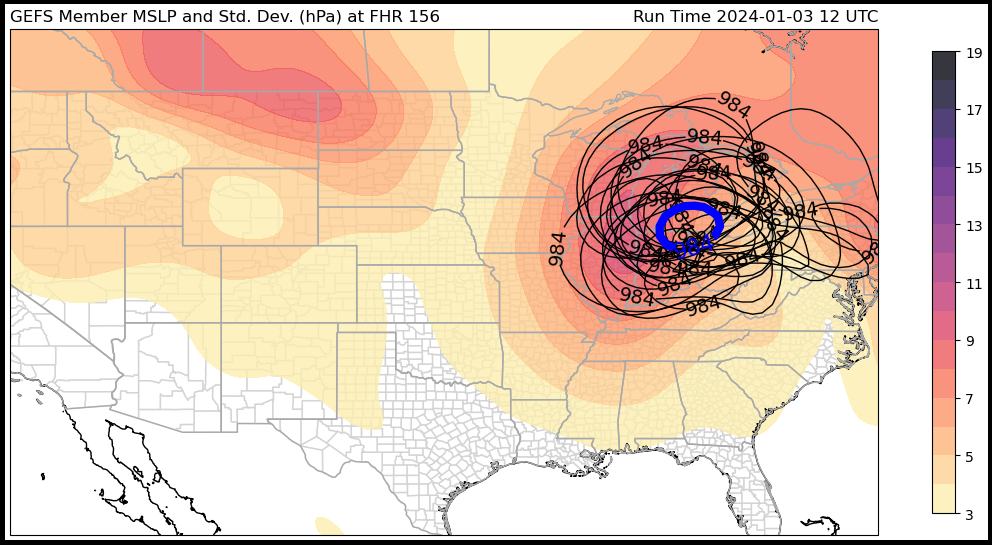

In [ ]:
fig = plt.figure(figsize=(14,8), facecolor='white', edgecolor = 'black', linewidth = 6)
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-120, -75, 26, 50])
meanmslp = ax.contour(gefsall.prmsl.longitude, gefsall.prmsl.latitude, gefsall.prmsl.isel(time=tval), colors = 'blue', linewidths = 6, levels = [984], zorder = 99)
mslpcon = ax.contour(gefscon.prmsl.longitude, gefscon.prmsl.latitude, gefscon.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs1p = ax.contour(gefs1.prmsl.longitude, gefs1.prmsl.latitude, gefs1.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs2p = ax.contour(gefs2.prmsl.longitude, gefs2.prmsl.latitude, gefs2.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs3p = ax.contour(gefs3.prmsl.longitude, gefs3.prmsl.latitude, gefs3.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs4p = ax.contour(gefs4.prmsl.longitude, gefs4.prmsl.latitude, gefs4.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs5p = ax.contour(gefs5.prmsl.longitude, gefs5.prmsl.latitude, gefs5.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs6p = ax.contour(gefs6.prmsl.longitude, gefs6.prmsl.latitude, gefs6.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs7p = ax.contour(gefs7.prmsl.longitude, gefs7.prmsl.latitude, gefs7.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs8p = ax.contour(gefs8.prmsl.longitude, gefs8.prmsl.latitude, gefs8.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs9p = ax.contour(gefs9.prmsl.longitude, gefs9.prmsl.latitude, gefs9.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs10p = ax.contour(gefs10.prmsl.longitude, gefs10.prmsl.latitude, gefs10.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs11p = ax.contour(gefs11.prmsl.longitude, gefs11.prmsl.latitude, gefs11.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs12p = ax.contour(gefs12.prmsl.longitude, gefs12.prmsl.latitude, gefs12.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs13p = ax.contour(gefs13.prmsl.longitude, gefs13.prmsl.latitude, gefs13.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs14p = ax.contour(gefs14.prmsl.longitude, gefs14.prmsl.latitude, gefs14.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs15p = ax.contour(gefs15.prmsl.longitude, gefs15.prmsl.latitude, gefs15.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs16p = ax.contour(gefs16.prmsl.longitude, gefs16.prmsl.latitude, gefs16.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs17p = ax.contour(gefs17.prmsl.longitude, gefs17.prmsl.latitude, gefs17.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs18p = ax.contour(gefs18.prmsl.longitude, gefs18.prmsl.latitude, gefs18.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs19p = ax.contour(gefs19.prmsl.longitude, gefs19.prmsl.latitude, gefs19.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs20p = ax.contour(gefs20.prmsl.longitude, gefs20.prmsl.latitude, gefs20.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs21p = ax.contour(gefs21.prmsl.longitude, gefs21.prmsl.latitude, gefs21.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs22p = ax.contour(gefs22.prmsl.longitude, gefs22.prmsl.latitude, gefs22.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs23p = ax.contour(gefs23.prmsl.longitude, gefs23.prmsl.latitude, gefs23.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs24p = ax.contour(gefs24.prmsl.longitude, gefs24.prmsl.latitude, gefs24.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs25p = ax.contour(gefs25.prmsl.longitude, gefs25.prmsl.latitude, gefs25.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs26p = ax.contour(gefs26.prmsl.longitude, gefs26.prmsl.latitude, gefs26.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs27p = ax.contour(gefs27.prmsl.longitude, gefs27.prmsl.latitude, gefs27.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs28p = ax.contour(gefs28.prmsl.longitude, gefs28.prmsl.latitude, gefs28.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs29p = ax.contour(gefs29.prmsl.longitude, gefs29.prmsl.latitude, gefs29.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
gefs30p = ax.contour(gefs30.prmsl.longitude, gefs30.prmsl.latitude, gefs30.prmsl.isel(time=tval), colors = 'black', linewidths = 1, levels = [984])
ax.clabel(meanmslp, fontsize = 16, colors = 'blue')
ax.clabel(mslpcon, fontsize = 14, colors = 'black')
ax.clabel(gefs1p, fontsize = 14, colors = 'black')
ax.clabel(gefs2p, fontsize = 14, colors = 'black')
ax.clabel(gefs3p, fontsize = 14, colors = 'black')
ax.clabel(gefs4p, fontsize = 14, colors = 'black')
ax.clabel(gefs5p, fontsize = 14, colors = 'black')
ax.clabel(gefs6p, fontsize = 14, colors = 'black')
ax.clabel(gefs7p, fontsize = 14, colors = 'black')
ax.clabel(gefs8p, fontsize = 14, colors = 'black')
ax.clabel(gefs9p, fontsize = 14, colors = 'black')
ax.clabel(gefs10p, fontsize = 14, colors = 'black')
ax.clabel(gefs11p, fontsize = 14, colors = 'black')
ax.clabel(gefs12p, fontsize = 14, colors = 'black')
ax.clabel(gefs13p, fontsize = 14, colors = 'black')
ax.clabel(gefs14p, fontsize = 14, colors = 'black')
ax.clabel(gefs15p, fontsize = 14, colors = 'black')
ax.clabel(gefs16p, fontsize = 14, colors = 'black')
ax.clabel(gefs17p, fontsize = 14, colors = 'black')
ax.clabel(gefs18p, fontsize = 14, colors = 'black')
ax.clabel(gefs19p, fontsize = 14, colors = 'black')
ax.clabel(gefs20p, fontsize = 14, colors = 'black')
ax.clabel(gefs21p, fontsize = 14, colors = 'black')
ax.clabel(gefs22p, fontsize = 14, colors = 'black')
ax.clabel(gefs23p, fontsize = 14, colors = 'black')
ax.clabel(gefs24p, fontsize = 14, colors = 'black')
ax.clabel(gefs25p, fontsize = 14, colors = 'black')
ax.clabel(gefs26p, fontsize = 14, colors = 'black')
ax.clabel(gefs27p, fontsize = 14, colors = 'black')
ax.clabel(gefs28p, fontsize = 14, colors = 'black')
ax.clabel(gefs29p, fontsize = 14, colors = 'black')
ax.clabel(gefs30p, fontsize = 14, colors = 'black')
stdev = ax.contourf(gefsspr.prmsl.longitude, gefsspr.prmsl.latitude, gefsspr.prmsl.isel(time=tval), cmap = 'magma_r', levels = np.arange(3,20,1), alpha = 0.8)
plt.colorbar(stdev, shrink=0.75, orientation = 'vertical')
ax.coastlines(color='black',resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
ax.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8, zorder = 0)
plt.title(f"GEFS Member MSLP and Std. Dev. (hPa) at FHR {fhr}", loc = 'left')
plt.title(f'Run Time {year}-{month}-{day} {run_hour} UTC', loc = 'right')
plt.savefig(f'MSLP_{year}_{month}_{day}_{run_hour}_FHR{fhr}.png', bbox_inches = 'tight')

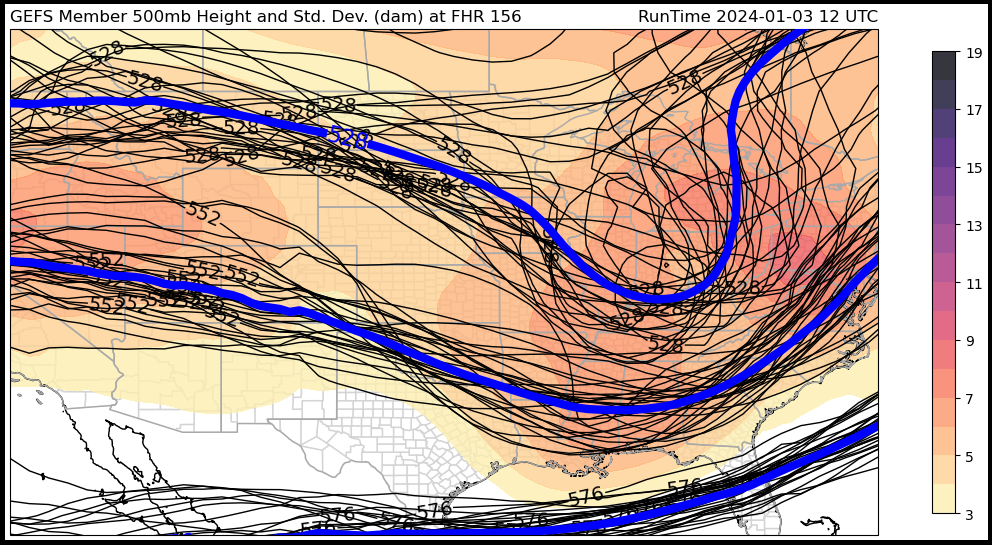

In [ ]:
fig = plt.figure(figsize=(14,8), facecolor='white', edgecolor = 'black', linewidth = 6)
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-120, -75, 26, 50])
meangh = ax.contour(gefsUAall['gh'].longitude, gefsUAall['gh'].latitude, gefsUAall['gh'].isel(time=tval), colors = 'blue', linewidths = 6, levels = list(range(480,577,24)), zorder = 99)
ghcon = ax.contour(gefsUAcon['gh'].longitude, gefsUAcon['gh'].latitude, gefsUAcon['gh'].isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs1h = ax.contour(gefsUA1['gh'].longitude, gefsUA1['gh'].latitude, gefsUA1['gh'].isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs2h = ax.contour(gefsUA2['gh'].longitude, gefsUA2['gh'].latitude, gefsUA2['gh'].isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs3h = ax.contour(gefsUA3['gh'].longitude, gefsUA3['gh'].latitude, gefsUA3['gh'].isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs4h = ax.contour(gefsUA4['gh'].longitude, gefsUA4['gh'].latitude, gefsUA4['gh'].isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs5h = ax.contour(gefsUA5['gh'].longitude, gefsUA5['gh'].latitude, gefsUA5['gh'].isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs6h = ax.contour(gefsUA6['gh'].longitude, gefsUA6['gh'].latitude, gefsUA6['gh'].isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs7h = ax.contour(gefsUA7['gh'].longitude, gefsUA7['gh'].latitude, gefsUA7['gh'].isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs8h = ax.contour(gefsUA8['gh'].longitude, gefsUA8['gh'].latitude, gefsUA8.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs9h = ax.contour(gefsUA9.gh.longitude, gefsUA9.gh.latitude, gefsUA9.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs10h = ax.contour(gefsUA10.gh.longitude, gefsUA10.gh.latitude, gefsUA10.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs11h = ax.contour(gefsUA11.gh.longitude, gefsUA11.gh.latitude, gefsUA11.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs12h = ax.contour(gefsUA12.gh.longitude, gefsUA12.gh.latitude, gefsUA12.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs13h = ax.contour(gefsUA13.gh.longitude, gefsUA13.gh.latitude, gefsUA13.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs14h = ax.contour(gefsUA14.gh.longitude, gefsUA14.gh.latitude, gefsUA14.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs15h = ax.contour(gefsUA15.gh.longitude, gefsUA15.gh.latitude, gefsUA15.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs16h = ax.contour(gefsUA16.gh.longitude, gefsUA16.gh.latitude, gefsUA16.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs17h = ax.contour(gefsUA17.gh.longitude, gefsUA17.gh.latitude, gefsUA17.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs18h = ax.contour(gefsUA18.gh.longitude, gefsUA18.gh.latitude, gefsUA18.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs19h = ax.contour(gefsUA19.gh.longitude, gefsUA19.gh.latitude, gefsUA19.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs20h = ax.contour(gefsUA20.gh.longitude, gefsUA20.gh.latitude, gefsUA20.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs21h = ax.contour(gefsUA21.gh.longitude, gefsUA21.gh.latitude, gefsUA21.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs22h = ax.contour(gefsUA22.gh.longitude, gefsUA22.gh.latitude, gefsUA22.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs23h = ax.contour(gefsUA23.gh.longitude, gefsUA23.gh.latitude, gefsUA23.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs24h = ax.contour(gefsUA24.gh.longitude, gefsUA24.gh.latitude, gefsUA24.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs25h = ax.contour(gefsUA25.gh.longitude, gefsUA25.gh.latitude, gefsUA25.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs26h = ax.contour(gefsUA26.gh.longitude, gefsUA26.gh.latitude, gefsUA26.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs27h = ax.contour(gefsUA27.gh.longitude, gefsUA27.gh.latitude, gefsUA27.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs28h = ax.contour(gefsUA28.gh.longitude, gefsUA28.gh.latitude, gefsUA28.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs29h = ax.contour(gefsUA29.gh.longitude, gefsUA29.gh.latitude, gefsUA29.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
gefs30h = ax.contour(gefsUA30.gh.longitude, gefsUA30.gh.latitude, gefsUA30.gh.isel(time=tval), colors = 'black', linewidths = 1, levels = list(range(480,577,24)))
ax.clabel(meangh, fontsize = 16, colors = 'blue')
ax.clabel(ghcon, fontsize = 14, colors = 'black')
ax.clabel(gefs1h, fontsize = 14, colors = 'black')
ax.clabel(gefs2h, fontsize = 14, colors = 'black')
ax.clabel(gefs3h, fontsize = 14, colors = 'black')
ax.clabel(gefs4h, fontsize = 14, colors = 'black')
ax.clabel(gefs5h, fontsize = 14, colors = 'black')
ax.clabel(gefs6h, fontsize = 14, colors = 'black')
ax.clabel(gefs7h, fontsize = 14, colors = 'black')
ax.clabel(gefs8h, fontsize = 14, colors = 'black')
ax.clabel(gefs9h, fontsize = 14, colors = 'black')
ax.clabel(gefs10h, fontsize = 14, colors = 'black')
ax.clabel(gefs11h, fontsize = 14, colors = 'black')
ax.clabel(gefs12h, fontsize = 14, colors = 'black')
ax.clabel(gefs13h, fontsize = 14, colors = 'black')
ax.clabel(gefs14h, fontsize = 14, colors = 'black')
ax.clabel(gefs15h, fontsize = 14, colors = 'black')
ax.clabel(gefs16h, fontsize = 14, colors = 'black')
ax.clabel(gefs17h, fontsize = 14, colors = 'black')
ax.clabel(gefs18h, fontsize = 14, colors = 'black')
ax.clabel(gefs19h, fontsize = 14, colors = 'black')
ax.clabel(gefs20h, fontsize = 14, colors = 'black')
ax.clabel(gefs21h, fontsize = 14, colors = 'black')
ax.clabel(gefs22h, fontsize = 14, colors = 'black')
ax.clabel(gefs23h, fontsize = 14, colors = 'black')
ax.clabel(gefs24h, fontsize = 14, colors = 'black')
ax.clabel(gefs25h, fontsize = 14, colors = 'black')
ax.clabel(gefs26h, fontsize = 14, colors = 'black')
ax.clabel(gefs27h, fontsize = 14, colors = 'black')
ax.clabel(gefs28h, fontsize = 14, colors = 'black')
ax.clabel(gefs29h, fontsize = 14, colors = 'black')
ax.clabel(gefs30h, fontsize = 14, colors = 'black')
stdev = ax.contourf(gefsUAspr.gh.longitude, gefsUAspr.gh.latitude, gefsUAspr.gh.isel(time=tval), cmap = 'magma_r', levels = np.arange(3,20,1), alpha = 0.8)
plt.colorbar(stdev, shrink=0.75, orientation = 'vertical')
ax.coastlines(color='black',resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
ax.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8, zorder = 0)
plt.title(f'GEFS Member 500mb Height and Std. Dev. (dam) at FHR {fhr}', loc = 'left')
plt.title(f'RunTime {year}-{month}-{day} {run_hour} UTC', loc = 'right')
plt.savefig(f'H5_{year}_{month}_{day}_{run_hour}_FHR{fhr}.png', bbox_inches = 'tight')

In [ ]:
gefsUATall = xr.open_mfdataset('./content/GEFS_Data/*geavg*pgrb2a.0p50*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50), latitude=slice(65,20))
gefsUATcon = xr.open_mfdataset('./content/GEFS_Data/*gec00*grb2a.0p50*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT1 = xr.open_mfdataset('./content/GEFS_Data/*gep01*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT2 = xr.open_mfdataset('./content/GEFS_Data/*gep02*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT3 = xr.open_mfdataset('./content/GEFS_Data/*gep03*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT4 = xr.open_mfdataset('./content/GEFS_Data/*gep04*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT5 = xr.open_mfdataset('./content/GEFS_Data/*gep05*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT6 = xr.open_mfdataset('./content/GEFS_Data/*gep06*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT7 = xr.open_mfdataset('./content/GEFS_Data/*gep07*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT8 = xr.open_mfdataset('./content/GEFS_Data/*gep08*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT9 = xr.open_mfdataset('./content/GEFS_Data/*gep09*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT10 = xr.open_mfdataset('./content/GEFS_Data/*gep10*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT11 = xr.open_mfdataset('./content/GEFS_Data/*gep11*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT12 = xr.open_mfdataset('./content/GEFS_Data/*gep12*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT13 = xr.open_mfdataset('./content/GEFS_Data/*gep13*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT14 = xr.open_mfdataset('./content/GEFS_Data/*gep14*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT15 = xr.open_mfdataset('./content/GEFS_Data/*gep15*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT16 = xr.open_mfdataset('./content/GEFS_Data/*gep16*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT17 = xr.open_mfdataset('./content/GEFS_Data/*gep17*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT18 = xr.open_mfdataset('./content/GEFS_Data/*gep18*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT19 = xr.open_mfdataset('./content/GEFS_Data/*gep19*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT20 = xr.open_mfdataset('./content/GEFS_Data/*gep20*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT21 = xr.open_mfdataset('./content/GEFS_Data/*gep21*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT22 = xr.open_mfdataset('./content/GEFS_Data/*gep22*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT23 = xr.open_mfdataset('./content/GEFS_Data/*gep23*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT24 = xr.open_mfdataset('./content/GEFS_Data/*gep24*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT25 = xr.open_mfdataset('./content/GEFS_Data/*gep25*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT26 = xr.open_mfdataset('./content/GEFS_Data/*gep26*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT27 = xr.open_mfdataset('./content/GEFS_Data/*gep27*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT28 = xr.open_mfdataset('./content/GEFS_Data/*gep28*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT29 = xr.open_mfdataset('./content/GEFS_Data/*gep29*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUAT30 = xr.open_mfdataset('./content/GEFS_Data/*gep30*grb2a.0p50*grb2', engine="cfgrib",
                        concat_dim="time", combine='nested',
                        backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50,2), latitude=slice(65,20,2))

gefsUATspr = xr.open_mfdataset('./content/GEFS_Data/*gespr*pgrb2a.0p50*grb2', engine="cfgrib",
                            concat_dim="time", combine='nested',
                           backend_kwargs={'filter_by_keys':{'shortName': 't'}}).sel(longitude=slice(360-150, 360-50), latitude=slice(65,20))


In [ ]:
gefsUATall=gefsUATall.isel(isobaricInhPa=np.where(gefsUATall.isobaricInhPa==850.)[0][0])
gefsUATcon=gefsUATcon.isel(isobaricInhPa=np.where(gefsUATcon.isobaricInhPa==850.)[0][0])
gefsUAT1=gefsUAT1.isel(isobaricInhPa=np.where(gefsUAT1.isobaricInhPa==850.)[0][0])
gefsUAT2=gefsUAT2.isel(isobaricInhPa=np.where(gefsUAT2.isobaricInhPa==850.)[0][0])
gefsUAT3=gefsUAT3.isel(isobaricInhPa=np.where(gefsUAT3.isobaricInhPa==850.)[0][0])
gefsUAT4=gefsUAT4.isel(isobaricInhPa=np.where(gefsUAT4.isobaricInhPa==850.)[0][0])
gefsUAT5=gefsUAT5.isel(isobaricInhPa=np.where(gefsUAT5.isobaricInhPa==850.)[0][0])
gefsUAT6=gefsUAT6.isel(isobaricInhPa=np.where(gefsUAT6.isobaricInhPa==850.)[0][0])
gefsUAT7=gefsUAT7.isel(isobaricInhPa=np.where(gefsUAT7.isobaricInhPa==850.)[0][0])
gefsUAT8=gefsUAT8.isel(isobaricInhPa=np.where(gefsUAT8.isobaricInhPa==850.)[0][0])
gefsUAT9=gefsUAT9.isel(isobaricInhPa=np.where(gefsUAT9.isobaricInhPa==850.)[0][0])
gefsUAT10=gefsUAT10.isel(isobaricInhPa=np.where(gefsUAT10.isobaricInhPa==850.)[0][0])
gefsUAT11=gefsUAT11.isel(isobaricInhPa=np.where(gefsUAT11.isobaricInhPa==850.)[0][0])
gefsUAT12=gefsUAT12.isel(isobaricInhPa=np.where(gefsUAT12.isobaricInhPa==850.)[0][0])
gefsUAT13=gefsUAT13.isel(isobaricInhPa=np.where(gefsUAT13.isobaricInhPa==850.)[0][0])
gefsUAT14=gefsUAT14.isel(isobaricInhPa=np.where(gefsUAT14.isobaricInhPa==850.)[0][0])
gefsUAT15=gefsUAT15.isel(isobaricInhPa=np.where(gefsUAT15.isobaricInhPa==850.)[0][0])
gefsUAT16=gefsUAT16.isel(isobaricInhPa=np.where(gefsUAT16.isobaricInhPa==850.)[0][0])
gefsUAT17=gefsUAT17.isel(isobaricInhPa=np.where(gefsUAT17.isobaricInhPa==850.)[0][0])
gefsUAT18=gefsUAT18.isel(isobaricInhPa=np.where(gefsUAT18.isobaricInhPa==850.)[0][0])
gefsUAT19=gefsUAT19.isel(isobaricInhPa=np.where(gefsUAT19.isobaricInhPa==850.)[0][0])
gefsUAT20=gefsUAT20.isel(isobaricInhPa=np.where(gefsUAT20.isobaricInhPa==850.)[0][0])
gefsUAT21=gefsUAT21.isel(isobaricInhPa=np.where(gefsUAT21.isobaricInhPa==850.)[0][0])
gefsUAT22=gefsUAT22.isel(isobaricInhPa=np.where(gefsUAT22.isobaricInhPa==850.)[0][0])
gefsUAT23=gefsUAT23.isel(isobaricInhPa=np.where(gefsUAT23.isobaricInhPa==850.)[0][0])
gefsUAT24=gefsUAT24.isel(isobaricInhPa=np.where(gefsUAT24.isobaricInhPa==850.)[0][0])
gefsUAT25=gefsUAT25.isel(isobaricInhPa=np.where(gefsUAT25.isobaricInhPa==850.)[0][0])
gefsUAT26=gefsUAT26.isel(isobaricInhPa=np.where(gefsUAT26.isobaricInhPa==850.)[0][0])
gefsUAT27=gefsUAT27.isel(isobaricInhPa=np.where(gefsUAT27.isobaricInhPa==850.)[0][0])
gefsUAT28=gefsUAT28.isel(isobaricInhPa=np.where(gefsUAT28.isobaricInhPa==850.)[0][0])
gefsUAT29=gefsUAT29.isel(isobaricInhPa=np.where(gefsUAT29.isobaricInhPa==850.)[0][0])
gefsUAT30=gefsUAT30.isel(isobaricInhPa=np.where(gefsUAT30.isobaricInhPa==850.)[0][0])
gefsUATspr=gefsUATspr.isel(isobaricInhPa=np.where(gefsUATspr.isobaricInhPa==850.)[0][0])

In [ ]:
gefsUATall['t'] = gefsUATall['t'].metpy.convert_units('degC')
gefsUATcon['t'] = gefsUATcon['t'].metpy.convert_units('degC')
gefsUAT1['t'] = gefsUAT1['t'].metpy.convert_units('degC')
gefsUAT2['t'] = gefsUAT2['t'].metpy.convert_units('degC')
gefsUAT3['t'] = gefsUAT3['t'].metpy.convert_units('degC')
gefsUAT4['t'] = gefsUAT4['t'].metpy.convert_units('degC')
gefsUAT5['t'] = gefsUAT5['t'].metpy.convert_units('degC')
gefsUAT6['t'] = gefsUAT6['t'].metpy.convert_units('degC')
gefsUAT7['t'] = gefsUAT7['t'].metpy.convert_units('degC')
gefsUAT8['t'] = gefsUAT8['t'].metpy.convert_units('degC')
gefsUAT9['t'] = gefsUAT9['t'].metpy.convert_units('degC')
gefsUAT10['t'] = gefsUAT10['t'].metpy.convert_units('degC')
gefsUAT11['t'] = gefsUAT11['t'].metpy.convert_units('degC')
gefsUAT12['t'] = gefsUAT12['t'].metpy.convert_units('degC')
gefsUAT13['t'] = gefsUAT13['t'].metpy.convert_units('degC')
gefsUAT14['t'] = gefsUAT14['t'].metpy.convert_units('degC')
gefsUAT15['t'] = gefsUAT15['t'].metpy.convert_units('degC')
gefsUAT16['t'] = gefsUAT16['t'].metpy.convert_units('degC')
gefsUAT17['t'] = gefsUAT17['t'].metpy.convert_units('degC')
gefsUAT18['t'] = gefsUAT18['t'].metpy.convert_units('degC')
gefsUAT19['t'] = gefsUAT19['t'].metpy.convert_units('degC')
gefsUAT20['t'] = gefsUAT20['t'].metpy.convert_units('degC')
gefsUAT21['t'] = gefsUAT21['t'].metpy.convert_units('degC')
gefsUAT22['t'] = gefsUAT22['t'].metpy.convert_units('degC')
gefsUAT23['t'] = gefsUAT23['t'].metpy.convert_units('degC')
gefsUAT24['t'] = gefsUAT24['t'].metpy.convert_units('degC')
gefsUAT25['t'] = gefsUAT25['t'].metpy.convert_units('degC')
gefsUAT26['t'] = gefsUAT26['t'].metpy.convert_units('degC')
gefsUAT27['t'] = gefsUAT27['t'].metpy.convert_units('degC')
gefsUAT28['t'] = gefsUAT28['t'].metpy.convert_units('degC')
gefsUAT29['t'] = gefsUAT29['t'].metpy.convert_units('degC')
gefsUAT30['t'] = gefsUAT30['t'].metpy.convert_units('degC')

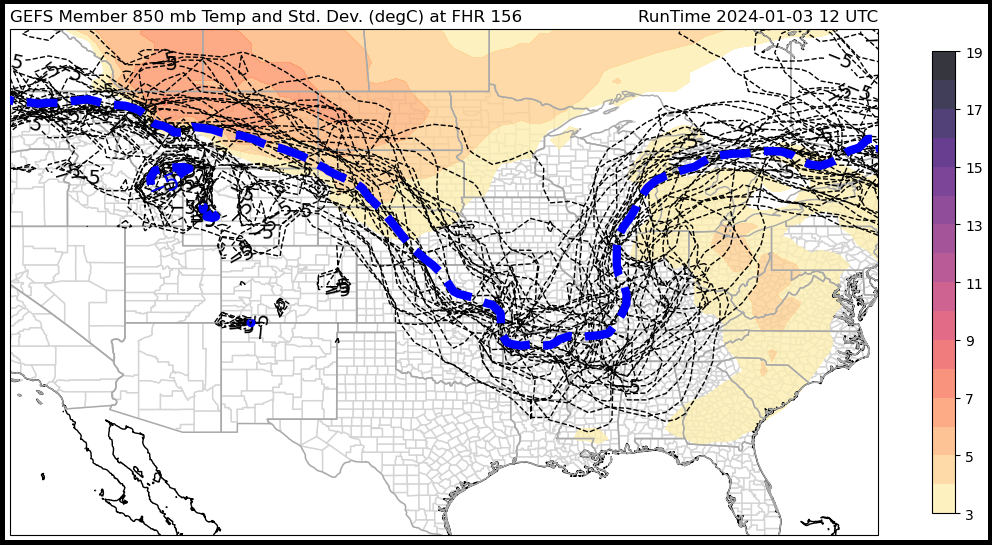

In [ ]:
fig = plt.figure(figsize=(14,8), facecolor='white', edgecolor = 'black', linewidth = 6)
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-120, -75, 26, 50])
meant = ax.contour(gefsUATall['t'].longitude, gefsUATall['t'].latitude, gefsUATall['t'].isel(time=tval), colors = 'blue', linewidths = 6, levels = [-5], zorder = 99)
tcon = ax.contour(gefsUATcon['t'].longitude, gefsUATcon['t'].latitude, gefsUATcon['t'].isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs1t = ax.contour(gefsUAT1['t'].longitude, gefsUAT1['t'].latitude, gefsUAT1['t'].isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs2t = ax.contour(gefsUAT2['t'].longitude, gefsUAT2['t'].latitude, gefsUAT2['t'].isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs3t = ax.contour(gefsUAT3['t'].longitude, gefsUAT3['t'].latitude, gefsUAT3['t'].isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs4t = ax.contour(gefsUAT4['t'].longitude, gefsUAT4['t'].latitude, gefsUAT4['t'].isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs5t = ax.contour(gefsUAT5['t'].longitude, gefsUAT5['t'].latitude, gefsUAT5['t'].isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs6t = ax.contour(gefsUAT6['t'].longitude, gefsUAT6['t'].latitude, gefsUAT6['t'].isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs7t = ax.contour(gefsUAT7['t'].longitude, gefsUAT7['t'].latitude, gefsUAT7['t'].isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs8t = ax.contour(gefsUAT8['t'].longitude, gefsUAT8['t'].latitude, gefsUAT8.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs9t = ax.contour(gefsUAT9.t.longitude, gefsUAT9.t.latitude, gefsUAT9.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs10t = ax.contour(gefsUAT10.t.longitude, gefsUAT10.t.latitude, gefsUAT10.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs11t = ax.contour(gefsUAT11.t.longitude, gefsUAT11.t.latitude, gefsUAT11.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs12t = ax.contour(gefsUAT12.t.longitude, gefsUAT12.t.latitude, gefsUAT12.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs13t = ax.contour(gefsUAT13.t.longitude, gefsUAT13.t.latitude, gefsUAT13.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs14t = ax.contour(gefsUAT14.t.longitude, gefsUAT14.t.latitude, gefsUAT14.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs15t = ax.contour(gefsUAT15.t.longitude, gefsUAT15.t.latitude, gefsUAT15.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs16t = ax.contour(gefsUAT16.t.longitude, gefsUAT16.t.latitude, gefsUAT16.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs17t = ax.contour(gefsUAT17.t.longitude, gefsUAT17.t.latitude, gefsUAT17.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs18t = ax.contour(gefsUAT18.t.longitude, gefsUAT18.t.latitude, gefsUAT18.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs19t = ax.contour(gefsUAT19.t.longitude, gefsUAT19.t.latitude, gefsUAT19.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs20t = ax.contour(gefsUAT20.t.longitude, gefsUAT20.t.latitude, gefsUAT20.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs21t = ax.contour(gefsUAT21.t.longitude, gefsUAT21.t.latitude, gefsUAT21.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs22t = ax.contour(gefsUAT22.t.longitude, gefsUAT22.t.latitude, gefsUAT22.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs23t = ax.contour(gefsUAT23.t.longitude, gefsUAT23.t.latitude, gefsUAT23.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs24t = ax.contour(gefsUAT24.t.longitude, gefsUAT24.t.latitude, gefsUAT24.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs25t = ax.contour(gefsUAT25.t.longitude, gefsUAT25.t.latitude, gefsUAT25.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs26t = ax.contour(gefsUAT26.t.longitude, gefsUAT26.t.latitude, gefsUAT26.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs27t = ax.contour(gefsUAT27.t.longitude, gefsUAT27.t.latitude, gefsUAT27.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs28t = ax.contour(gefsUAT28.t.longitude, gefsUAT28.t.latitude, gefsUAT28.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs29t = ax.contour(gefsUAT29.t.longitude, gefsUAT29.t.latitude, gefsUAT29.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
gefs30t = ax.contour(gefsUAT30.t.longitude, gefsUAT30.t.latitude, gefsUAT30.t.isel(time=tval), colors = 'black', linewidths = 1, levels = [-5])
ax.clabel(meant, fontsize = 16, colors = 'blue')
ax.clabel(tcon, fontsize = 14, colors = 'black')
ax.clabel(gefs1t, fontsize = 14, colors = 'black')
ax.clabel(gefs2t, fontsize = 14, colors = 'black')
ax.clabel(gefs3t, fontsize = 14, colors = 'black')
ax.clabel(gefs4t, fontsize = 14, colors = 'black')
ax.clabel(gefs5t, fontsize = 14, colors = 'black')
ax.clabel(gefs6t, fontsize = 14, colors = 'black')
ax.clabel(gefs7t, fontsize = 14, colors = 'black')
ax.clabel(gefs8t, fontsize = 14, colors = 'black')
ax.clabel(gefs9t, fontsize = 14, colors = 'black')
ax.clabel(gefs10t, fontsize = 14, colors = 'black')
ax.clabel(gefs11t, fontsize = 14, colors = 'black')
ax.clabel(gefs12t, fontsize = 14, colors = 'black')
ax.clabel(gefs13t, fontsize = 14, colors = 'black')
ax.clabel(gefs14t, fontsize = 14, colors = 'black')
ax.clabel(gefs15t, fontsize = 14, colors = 'black')
ax.clabel(gefs16t, fontsize = 14, colors = 'black')
ax.clabel(gefs17t, fontsize = 14, colors = 'black')
ax.clabel(gefs18t, fontsize = 14, colors = 'black')
ax.clabel(gefs19t, fontsize = 14, colors = 'black')
ax.clabel(gefs20t, fontsize = 14, colors = 'black')
ax.clabel(gefs21t, fontsize = 14, colors = 'black')
ax.clabel(gefs22t, fontsize = 14, colors = 'black')
ax.clabel(gefs23t, fontsize = 14, colors = 'black')
ax.clabel(gefs24t, fontsize = 14, colors = 'black')
ax.clabel(gefs25t, fontsize = 14, colors = 'black')
ax.clabel(gefs26t, fontsize = 14, colors = 'black')
ax.clabel(gefs27t, fontsize = 14, colors = 'black')
ax.clabel(gefs28t, fontsize = 14, colors = 'black')
ax.clabel(gefs29t, fontsize = 14, colors = 'black')
ax.clabel(gefs30t, fontsize = 14, colors = 'black')
stdev = ax.contourf(gefsUATspr.t.longitude, gefsUATspr.t.latitude, gefsUATspr.t.isel(time=tval), cmap = 'magma_r', levels = np.arange(3,20,1), alpha = 0.8)
plt.colorbar(stdev, shrink=0.75, orientation = 'vertical')
ax.coastlines(color='black',resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('50m'),edgecolor='darkgray')
ax.add_feature(USCOUNTIES, facecolor='None', edgecolor='lightgray', alpha = 0.8, zorder = 0)
plt.title(f'GEFS Member 850 mb Temp and Std. Dev. (degC) at FHR {fhr}', loc = 'left')
plt.title(f'RunTime {year}-{month}-{day} {run_hour} UTC', loc = 'right')
plt.savefig(f'H8_{year}_{month}_{day}_{run_hour}_FHR{fhr}.png', bbox_inches = 'tight')